### 미션: 구별 동단의 건물주용별 평균 시세
#### 1. 구단위 데이터 조회
- 구 이름 입력
- 서울특별시_부동산_실거래가_정보_2020년.csv 파일에서 해당 구 이름을 기준으로 데이터 조회
- '자치구명', '법정동명', '건물주용도', '건축년도', '건물면적', '층정보', '물건금액', '건물명' 리스트 데이터로 추가

In [1]:
# 사용자로부터 구명 입력받아 데이터 조회
# 출력값: '자치구명', '법정동명', '건물주용도', '건축년도', '건물면적', '층정보', '물건금액', '건물명'
#             3            5          15(-4)      17(-2)      11          13       16(-3)      18(-1)     
# 출력형식: 리스트 구조 출력

import csv

g_name=input('조회 구 이름 입력:')
#d_name=input('조회 동 이름 입력:')

f=open('./data/서울특별시_부동산_실거래가_정보_2020년.csv')
data=csv.reader(f)
header=next(data)
#print(header)

data_lst=[]

for row in data:
    if g_name == row[3]:      #  and d_name in row[5]
        data_lst.append([ row[3],row[5],row[15],row[17],row[11],row[13],row[16],row[18] ])

f.close()

#data_lst

조회 구 이름 입력:성북구


#### 2. 조회 구의 동별 아파트 평균 가격 계산
- 해당 구에 어떤 동이 있는지 동 리스트 찾기
- 해당 리스트를 이용해 동별 아파트 평균(합계/수량) 계산
- 동별 평균 출력

In [2]:
# 동 리스트 생성
d_name=[]
for lst in data_lst:
    if lst[1] not in d_name:
        d_name.append(lst[1])

#print(d_name)

avg_lst=[]

# 동별 평균값 계산
for dong in d_name:
    tot=0     # 동 합계 초기화
    cnt=0     # 동 조회 건수 초기화
    # 각 동별 아파트의 금액합계, 조회 건수 계산
    for lst in data_lst:
        if dong == lst[1] and '아파트' == lst[2]:
            tot += int(lst[-2])
            cnt += 1
    if cnt == 0:
        avg_lst.append({"동이름":dong, "평균판매가":0, "거래건수":cnt})
    else:
        avg=tot/cnt
        avg_lst.append({"동이름":dong, "평균판매가":int(avg), "거래건수":cnt})

import pandas as pd

df=pd.DataFrame(avg_lst)
df

,동이름,평균판매가,거래건수
0,장위동,743787678,168
1,길음동,843763421,871
2,석관동,673315019,253
3,성북동,332900000,10
4,돈암동,675744147,786
5,정릉동,529745429,1072
6,상월곡동,555521739,115
7,동선동5가,0,0
8,동선동3가,440000000,1
9,종암동,739472074,376


#### 3. 동별 평균 계산값을 그래프를 이용해 비교 분석
- pandas 모듈을 이용한 데이터 관리
- 꺾은선 그래프
- 막대 그래프
- boxplot 그래프

In [7]:
df1=df[df['평균판매가'] != 0]
df1.sort_values(by=['거래건수'], ascending=False)  # DataFrame 구조에서 정렬하기, 

,동이름,평균판매가,거래건수
5,정릉동,529745429,1072
1,길음동,843763421,871
4,돈암동,675744147,786
11,하월곡동,692055138,506
9,종암동,739472074,376
2,석관동,673315019,253
0,장위동,743787678,168
13,보문동6가,824054054,148
6,상월곡동,555521739,115
16,삼선동2가,744601063,94


In [15]:
# 정렬한 결과 값을 메모리에 저장(변수 업데이트)

# df1.sort_values(by=['거래건수'], ascending=False, inplace=True)
df1=df1.sort_values(by=['거래건수'], ascending=False)  # 거래건수에 따른 내림차순 정렬
df1

,동이름,평균판매가,거래건수
5,정릉동,529745429,1072
1,길음동,843763421,871
4,돈암동,675744147,786
11,하월곡동,692055138,506
9,종암동,739472074,376
2,석관동,673315019,253
0,장위동,743787678,168
13,보문동6가,824054054,148
6,상월곡동,555521739,115
16,삼선동2가,744601063,94


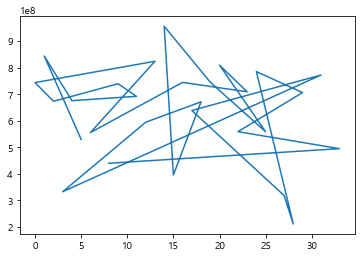

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

df1['평균판매가'].plot()
plt.show()

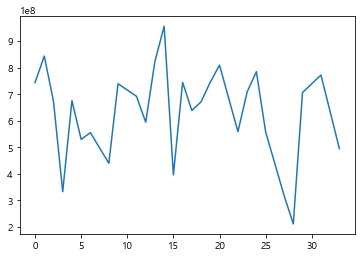

In [19]:
df1=df1.sort_index()    # index 값을 기준으로 오름차순 정렬
df1['평균판매가'].plot()
plt.show()

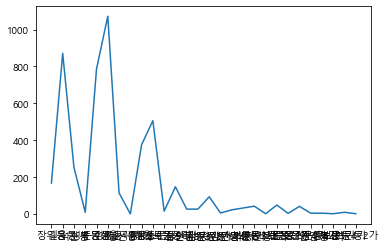

In [22]:
plt.plot(df1['동이름'], df1['거래건수'])
plt.show()

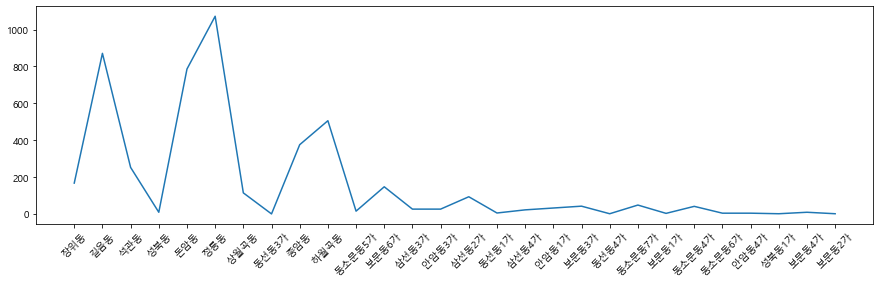

In [26]:
plt.figure(figsize=(15, 4))
plt.xticks(size=10, rotation=45)
plt.plot(df1['동이름'], df1['거래건수'])
plt.show()

In [31]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### 막대그래프

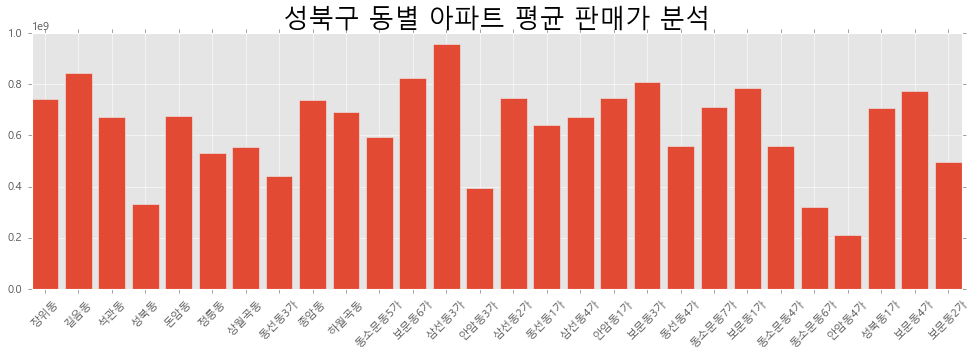

In [38]:
import matplotlib.font_manager as fm

font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

plt.style.use('ggplot')
plt.figure(figsize=(15, 4))
plt.xticks(size=10, rotation=45)
plt.bar(df1['동이름'], df1['평균판매가'])

plt.title(g_name + ' 동별 아파트 평균 판매가 분석', size=23)

plt.show()

#### boxplot 그래프
- 연속형 변수에 대해서 최소값(min), 제 1사분위수(Q1), 중앙값(Q2, median), 제 3사분위수(Q3), 최대값(max) 의 요약통계량을 계산하는 것

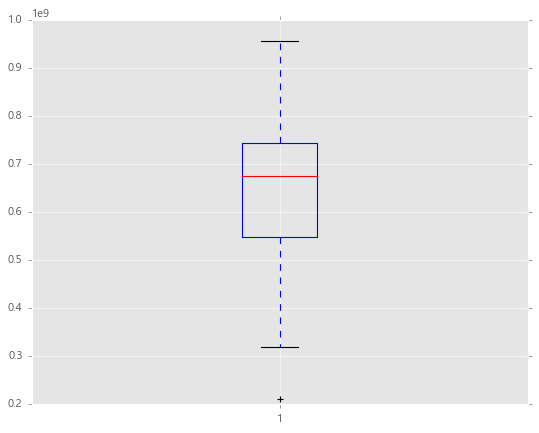

In [40]:
plt.boxplot(df1['평균판매가'])
plt.show()